# Introduction
This notebook was forked from the original by Rachael Tatman at Kaggle, which was provided as part of the Kaggle Professional Skills series on Dashboarding with Notebooks. This is the first in a series of 5 notebooks, with one for each day of the course.

The first cell gives information and instructions to outline the requirements; the subsequent cells detail the steps to completion.

---

Welcome to the first day of Dashboarding with scheduled notebooks. Today we're going to do two things:

* Pick a dataset to work with
* Figure out what data we should include in our dashboard

Today's timeline: 

* **5 minutes:** Read notebook
* **5 minutes:** Pick dataset and read over the documentation, determining what the most important information should be
* **5 minutes:** Start kernel and read in data
* **5 minutes:** Create one or more visualizations (no need to worry about pretty; quick and dirty will work!)

# Picking a dataset

Not every dataset needs to be dashboarded. Dashboards are useful because they make it easy to monitor things that change over time, which means it only makes sense to use datasets that are updated; there's usually no reason to go to all the trouble of building a dashboard for a static dataset when a plain notebook or markdown document will do just as well. 

The method we're going to be using--scheduling our notebooks rather than continuously updating them--works best for datasets that are batch processed. 

> **Batch data processing** refers to data processing that happens at a single point in time, usually by running a script. It's opposed to **streaming data processing** which happens continuously. 

I've put together a list of Kaggle datasets that are batch processed and updated daily for you here. It’s mostly public data that’s provided by cities in the US, but Kaggle’s own public data, Meta Kaggle, is also updated daily. Pick one that you like and create a new Kernel using it as a data source. 

* [Meta Kaggle](https://www.kaggle.com/kaggle/meta-kaggle)
* [Procurement Notices](https://www.kaggle.com/theworldbank/procurement-notices)
* [Chicago Red Light and Speed Camera Data](https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data)
* [Chicago 311 Service Requests](https://www.kaggle.com/chicago/chicago-311-service-requests)
* [Seattle Road Weather Information Stations](https://www.kaggle.com/city-of-seattle/seattle-road-weather-information-stations)
* [Seattle Use of Force](https://www.kaggle.com/city-of-seattle/seattle-use-of-force) (There's currently a problem with our mirror of this dataset. You can also access the data [here](https://www.seattle.gov/police/information-and-data/use-of-force-data).)
* [Seattle Crisis Data](https://www.kaggle.com/city-of-seattle/seattle-crisis-data)
* [Los Angeles Parking Citations](https://www.kaggle.com/cityofLA/los-angeles-parking-citations)
* [What's Happening LA Calendar Dataset](https://www.kaggle.com/cityofLA/what's-happening-la-calendar-dataset)
* [Oakland Call Center & Public Work Service Requests](https://www.kaggle.com/cityofoakland/oakland-call-center-public-work-service-requests)
* [NY Bus Breakdown and Delays](https://www.kaggle.com/new-york-city/ny-bus-breakdown-and-delays)
* [NYPD Motor Vehicle Collisions](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions)
* [NY Daily Inmates In Custody](https://www.kaggle.com/new-york-city/ny-daily-inmates-in-custody)
* [NYS Turnstile Usage Data](https://www.kaggle.com/new-york-state/nys-turnstile-usage-data)
* [NOAA Global Surface Summary of the Day](https://www.kaggle.com/noaa/noaa-global-surface-summary-of-the-day/)
* [SF Fire Data (Incidents, Violations, and more)](https://www.kaggle.com/san-francisco/sf-fire-data-incidents-violations-and-more)
* [SF Restaurant Scores - LIVES Standard](https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard)

# Figure out what data should be dashboarded

Because we're picking public datasets rather than working from one we've been given by our co-workers, we unfortunately can't use the most effective technique to figure out what information to include: asking whoever gave you the data. 

> The easiest way to figure out what to include in a dashboard is to ask stakeholders (other people that care about what's in your data and you would want to use the dashboard) what they'd consider the most important information.

Failing that, there are some general guidelines you can use to figure out what information to include in a dashboard. 

* *What information is changing relatively quickly (every day or hour)?* Information that only changes every quarter or year probably belong in a report, not a dashboard. 
* *What information is the most important to your mission?* If you're a company, things like money or users are probably going to be pretty important, but if you're a school district you probably care more about things like attendance or grades.
* *What will affect the choices you or others will need to make?* Are you running A/B tests and need to choose which model to keep in production based on them? Then it's probably important that you track your metrics and other things that might affect those metrics, like sales that are running at the same time. Is there some outside factor that might affect your business, like the weather forecast next week? Then it might make sense to pull in another dataset and show that as well.
* *What changes have you made?* If you're tuning parameters or adjusting teaching schedules, you want to track the fact that you've made those changes and also how they've affected outcomes.

# Your turn!

Pick a dataset that's updated daily by Kaggle from this list. Imagine you work for the organization that produced it and identify factors in the dataset that might represent:

* The goals of your organization (like users or measures of pollution)
* Things that you (or your colleagues) can change to affect those goals (like advertising spending or the number of factory inspections)
* Thing you can't change but that will affect the outcome (like the school year, or weather conditions)

You might not find all three in the same dataset, but you should be able to pinpoint at least one. I'd recommend using the summary statistics in the Data tab of the dataset or reading the documentation in the Overview tab to help identify them.

Then start a kernel on that dataset ([this video has a quick walk-through if you need a quick refresher on how to do this](https://youtu.be/fvF2H85ko9c)) and put together two quick visualizations or summary tables that show two of the factors you've identified in the first step.

If you like, you can make your kernel public and share a link to it in the comments on this dataset to share with other participants. (And you can take a peek at other people's work to see what they've chosen to look at!) I'll pick a couple that I especially like to highlight as examples. :)

---

# Dataset selection
I chose to work with the [NYS Turnstile Usage Data](https://www.kaggle.com/new-york-state/nys-turnstile-usage-data) as a find pedestrian behaviour and human flow dynamics quite interesting. Data is provided for 2017 and 2018 and contains the following fields:

    
| **Data Label**  | **Data Type**  | **Description**  | **Example Values** |
| --- | --- | --- | --- |
| C/A | String | Internal identification of a booth at a given station | A002 |
| UnitRemote | String | Unit ID of station | R001 |
| SCP | String | Address for a given device | 01-00-01 |
| Station Name | String | Used in all references to station | 34 ST-HERALD SQ |
| Line Name | String | Train lines stopping at this location | 456 |
| Division | String | Operating company the line originally belong to | BMT |
| Date | Date | Date of the audit data (MM/DD/YYYY) | 11/18/2017 |
| Time | Time | Time of the reported data (HH:MM:SS) | 02:00:00 |
| Description | String | Represents the "REGULAR" scheduled audit event (Normally occurs every 4 hours) | REGULAR |
| Entries | Integer | Cumulative ENTRY register value for a device; initialized during system setup | 0001649720 |
| Exits | Integer | Cumulative EXITS register value for a device. Similar to Entries | 0004863606 |

Additional information: 
- Data is transmitted in the form of audit reports. The normal interval between audit reports for the same device is 4 hours. The four hour intervals will differ from other stations due to the need for staggering to prevent flooding the system with audit readings all at once. System-wide, stations have been set to begin audit transmittal between 00 to 03 hours, then every 4 hours after the first audit of the day
- Audits may occur more frequently than 4 hours due to planning, or troubleshooting activities. Furthermore, there may be a "RECOVR AUD" entry, refering to a missed audit that was recovered

## Important factors

The essense of this data is that it provides a number (entries/exits), per time, per location (booth/station); other fields provide information that can be used to gain deeper insight (e.g. Line Name) or that is used by the operator for control/monitoring of the system (e.g. audit event description). 

The overarching goal of the NYS, as a government body, is to provide a reliable, efficient and cost-effective service. To achieve this goal, certain requirements must be met, such as:
- efficient scheduling of trains, i.e. there are enough trains at the right times to avoid/reduce bottlenecks in the system, while also limiting the number of trains at times when it is less busy
- stations are adequately staffed, i.e. more staff will be needed at busier stations or busier times of day
- closures/disruptions can be dealt with (e.g. through diversions or replacement services) in a way that reduces the impact on passengers
- stations never become so overcrowded that fire and health and safety standards are breached

For the most part systems such as the New York subway exhibit behaviour which can be predicted fairly well based solely based on seasonality and trends, but they are also subject to spikes that can only be anticipated by bringing in other information. For example, one could imagine that on the day of the New York City marathon or the Thanks Giving Day parade, there would be a drastic increase in the number of passengers; its possible this could be predicted to some degree by incorporating information about dates of past and upcoming events and predicting for the upcoming date based on the past. There are other factors that are likely secondary in terms of their effect on the data versus large events, such as the weather conditions.

# Reading data
Read the data for 2017 and 2018 into separate dataframes and concatenate.

In [1]:
from pathlib import Path  # Easy-to-use, cross-platform path-to-file.

import numpy as np
import pandas as pd

In [2]:
path_to_data = Path('../input')

data_2017 = pd.read_csv(path_to_data / 'turnstile-usage-data-2017.csv')
data_2018 = pd.read_csv(path_to_data / 'turnstile-usage-data-2018.csv')

data = pd.concat([data_2017, data_2018])
data.columns.values[-1] = 'Exits'  # Fix Exits column name.

data['Timestamp'] = pd.to_datetime(data['Date']) + pd.to_timedelta(data['Time'])  # Consolitdate date and time.

data.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Timestamp
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-31T00:00:00,03:00:00,REGULAR,5991546,2028378,2016-12-31 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-31T00:00:00,07:00:00,REGULAR,5991565,2028389,2016-12-31 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-31T00:00:00,11:00:00,REGULAR,5991644,2028441,2016-12-31 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-31T00:00:00,15:00:00,REGULAR,5991971,2028502,2016-12-31 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-31T00:00:00,19:00:00,REGULAR,5992418,2028543,2016-12-31 19:00:00


# Visualisation

In [3]:
import matplotlib.pyplot as plt  # Quick plotting.
import seaborn  # Make plotting better.
%matplotlib inline

## Entries & exits in time
To provide an example of how the entries & exit numbers vary in time, this section plots the incremental (i.e. non-cumulative) counts over 3 weeks at 1st Avenue. There are two lines for each turnstile, one for entries and one for exits; entries are shown in green and the exits are in red. 

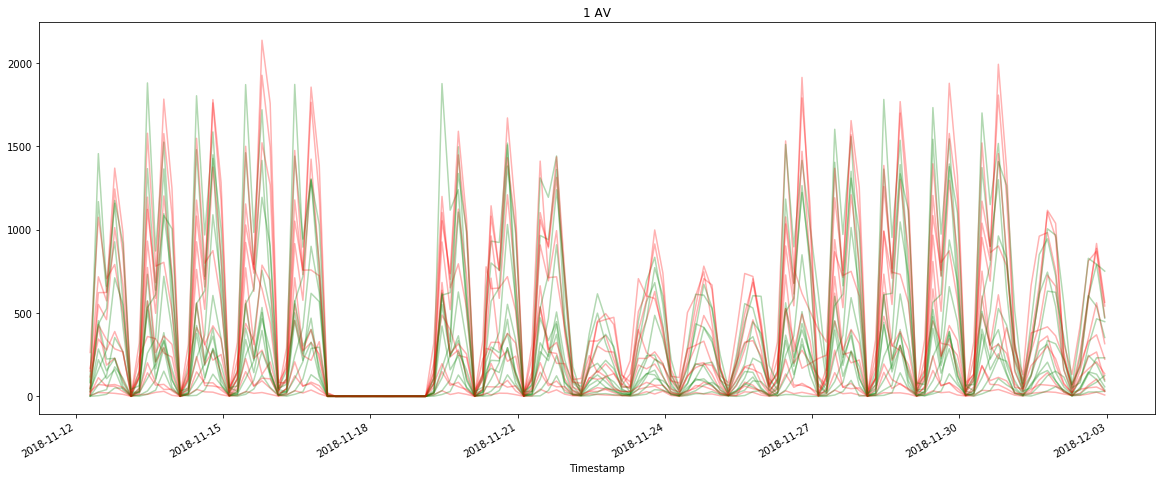

In [4]:
# Plot 
i = 0
for station, x in data.groupby(['Station']):
    fig, ax = plt.subplots(figsize=(20, 8)) 
    
    for scp, y in x.groupby(['SCP']):
        temp = y.copy()
        try:
            temp.set_index('Timestamp').loc['2018-11-12':'2018-12-02', 'Entries'].diff().plot(ax=ax, color='green', alpha=0.3)
            temp.set_index('Timestamp').loc['2018-11-12':'2018-12-02', 'Exits'].diff().plot(ax=ax, color='red', alpha=0.3)
        except TypeError:
            continue
    
    ax.set_title(station)

    i += 1
    if i > 0:
        break

Some of the key features that can be seen above are as follows:
- different turnstiles can have drastically different counts;
- the counts are not homogeneous throughout the day, with apparently slightly more entries in the morning and more exits in the evening;
- there are two weekends with zero or near-zero counts (was the station closed?);
- the effects of Thanksgiving and Black Friday (both national holidays) can be seen in the middle week, where the Thursday and Friday counts are signficantly lower than other weeks.

## Network size
To give an idea of the scale of the network, and thus the importance making the best use of the data available, this section presents...

In [5]:
groupcols = ['Line Name', 'Station']
temp = pd.DataFrame(data.groupby(groupcols).size().index.tolist(), columns=groupcols)

# Get individual lines from line name (i.e. if Line Name = 12 then split into 1 & 2).
line_names = temp['Line Name'].apply(lambda x: pd.Series(np.ones(len(x)), index=list(x))).fillna(0).astype(bool)  # Is station on line?
line_names['Station'] = temp['Station']
line_names.set_index('Station', inplace=True)
line_names.head()

,1,2,3,7,A,C,E,N,Q,R,...,L,M,B,D,4,5,J,Z,6,G
Station,,,,,,,,,,,,,,,,,,,,,
103 ST,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116 ST-COLUMBIA,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125 ST,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137 ST CITY COL,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145 ST,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


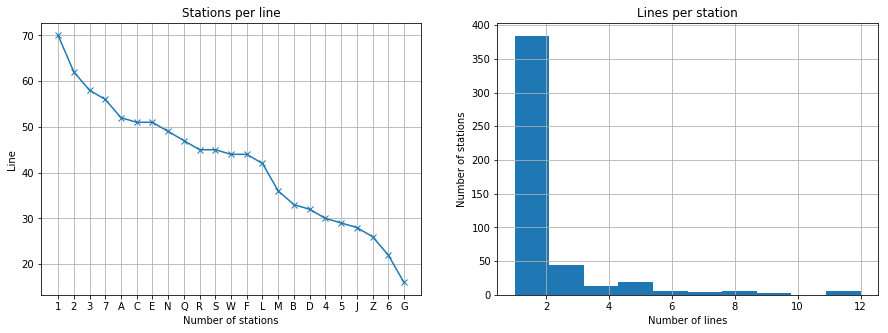

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
line_names.sum(axis=0).sort_values(ascending=False).plot(ax=ax[0], marker='x')
line_names.sum(axis=1).sort_values(ascending=False).hist(ax=ax[1])
ax[0].set_xticks(list(range(len(line_names.columns.tolist()))))
ax[0].set_xticklabels(line_names.columns.tolist())
ax[0].set_title('Stations per line')
ax[0].set_xlabel('Number of stations')
ax[0].set_ylabel('Line')
ax[1].set_title('Lines per station')
ax[1].set_xlabel('Number of lines')
ax[1].set_ylabel('Number of stations')
ax[0].grid()